In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Identity metrics

In [28]:
identity_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_encoded_HAP1_TGFB.csv",
                              index_col=0)

In [29]:
identity_metrics.mean(1)

r_squared           0.996708
sinkhorn_div_1      4.053677
sinkhorn_div_10     0.645993
sinkhorn_div_100    0.352399
e_distance          0.660579
mmd                 0.005234
dtype: float64

CellFlow

In [30]:
cellflow_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/cellflow_ood_metrics_encoded_HAP1_TGFB.csv",
                              index_col=0)

In [31]:
cellflow_metrics.mean(1)

r_squared           0.995097
sinkhorn_div_1      4.435985
sinkhorn_div_10     1.008198
sinkhorn_div_100    0.552819
e_distance          1.009015
mmd                 0.007859
dtype: float64

Metrics

In [32]:
mean_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/mean_train_metrics_encoded_HAP1_TGFB.csv",
                              index_col=0)

In [33]:
mean_metrics.mean(1)

r_squared            -0.657638
sinkhorn_div_1      176.732711
sinkhorn_div_10     173.324928
sinkhorn_div_100    173.031346
e_distance          346.018901
mmd                   0.454629
dtype: float64

## Get gene list by distance from the controls 

In [34]:
identity_deg = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_deg_HAP1_TGFB.csv",
                              index_col=0)

In [35]:
gene_list = identity_deg.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [36]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

# Plot comparisons

In [38]:
merged = pd.concat([identity_metrics, mean_metrics, cellflow_metrics], axis=1).T

In [40]:
merged["Model"] = ["Identity"]*identity_metrics.shape[1] + ["Mean"]*mean_metrics.shape[1] + ["cellFlow"]*cellflow_metrics.shape[1]

In [41]:
perturbation_cat = []
for pert in merged.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])
merged["Perturbation effect"] = perturbation_cat

In [42]:
pathways = []
cell_lines = []

for cat in merged.index:
    cell_line, pathway, _ = cat.split("_")
    pathways.append(pathway)
    cell_lines.append(cell_line)

In [43]:
# merged["pathway"] = pathways
# merged["cell_line"] = cell_lines
# merged = merged.loc[merged.pathway=="IFNG"]

In [44]:
merged

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,Model,Perturbation effect
HAP1_TGFB_ATF2,0.998814,3.724948,0.405685,0.138432,0.251874,0.003609,Identity,0
HAP1_TGFB_HDAC4,0.998371,3.806369,0.532372,0.224787,0.382569,0.004427,Identity,2
HAP1_TGFB_KRAS,0.999319,3.517622,0.256403,0.087507,0.149261,0.002885,Identity,3
HAP1_TGFB_MAPK14,0.997611,3.866039,0.487074,0.258169,0.492565,0.003434,Identity,4
HAP1_TGFB_MED15,0.987815,5.693951,1.727453,1.169777,2.245701,0.012565,Identity,1
HAP1_TGFB_NRAS,0.995141,5.272939,0.982176,0.530264,0.988589,0.007851,Identity,0
HAP1_TGFB_PPP2CA,0.997695,4.823822,0.701307,0.289345,0.488859,0.006294,Identity,0
HAP1_TGFB_SMAD3,0.998634,3.341988,0.306494,0.157499,0.289033,0.002352,Identity,4
HAP1_TGFB_SMAD4,0.996992,4.311860,0.565046,0.325668,0.623110,0.006370,Identity,1
HAP1_TGFB_SMURF1,0.997991,3.063850,0.389940,0.212769,0.415157,0.002692,Identity,3


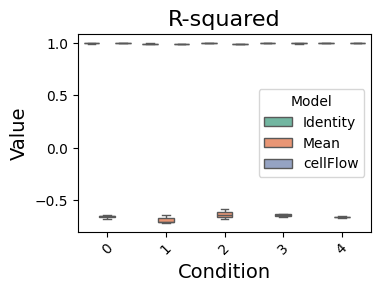

In [45]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="r_squared", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("R-squared", fontsize=16)
plt.xlabel("Condition", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

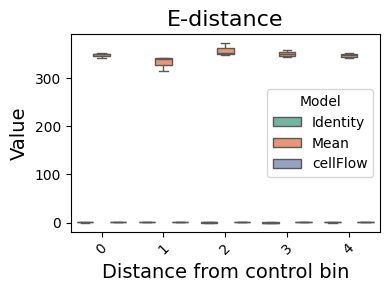

In [46]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [21]:
# plt.figure(figsize=(4, 3))
# sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("E-distance", fontsize=16)
# plt.xlabel("Distance from control bin", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [51]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_100", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 100", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="mmd", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("MMD", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
s